In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
patient = pd.read_csv('/content/drive/MyDrive/dataset/project_team3_delivery/서울시 코로나19 확진자 현황.csv',encoding='utf-8')
patient = patient[['연번', '확진일', '지역', '접촉력']]
patient.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,연번,확진일,지역,접촉력
0,190332,2021-12-14,강북구,감염경로 조사중
1,190331,2021-12-14,관악구,감염경로 조사중
2,190330,2021-12-14,성북구,감염경로 조사중
3,190329,2021-12-14,송파구,감염경로 조사중
4,190328,2021-12-14,노원구,감염경로 조사중
5,190327,2021-12-14,송파구,감염경로 조사중
6,190326,2021-12-14,강북구,감염경로 조사중
7,190325,2021-12-14,노원구,감염경로 조사중
8,190324,2021-12-14,타시도,감염경로 조사중
9,190323,2021-12-14,서초구,감염경로 조사중


In [ ]:
patient = patient[::-1] # 역순으로 정렬(오름차순으로 변경)
patient

In [ ]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190332 entries, 190331 to 0
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   연번      190332 non-null  int64 
 1   확진일     190332 non-null  object
 2   지역      190332 non-null  object
 3   접촉력     190332 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.8+ MB


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
patient['확진일'] = pd.to_datetime(patient['확진일'], format='%Y-%m-%d') #object형식을 datetime으로 변경

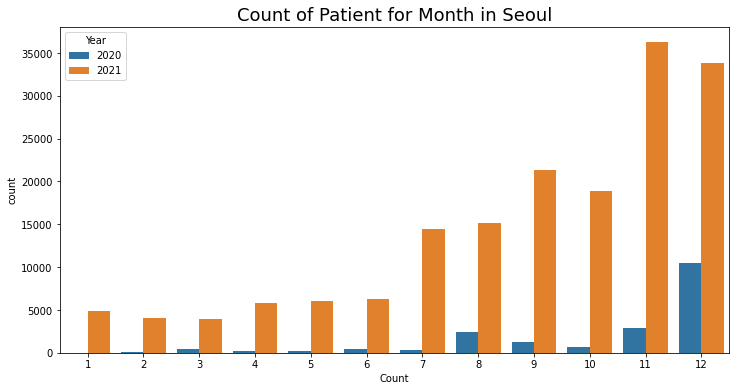

In [ ]:
month = patient['확진일'].dt.month
year = patient['확진일'].dt.year
plt.figure(figsize = (12,6))
sns.countplot(x=month, hue=year, data=patient)
plt.title('Count of Patient for Month in Seoul', fontsize=18)   # 제목
plt.xlabel('Count')
plt.legend(title = "Year")
sns.set(style="darkgrid")
plt.show()

In [ ]:
patient_2021_11 = patient[(patient['확진일'].dt.year==2021) & (patient['확진일'].dt.month==11)]
patient_2021_11

,연번,확진일,지역,접촉력
70093,120239,2021-11-01,기타,동대문구 소재 복지시설 관련
70092,120240,2021-11-01,도봉구,기타 확진자 접촉
70091,120241,2021-11-01,도봉구,기타 확진자 접촉
70090,120242,2021-11-01,중랑구,기타 확진자 접촉
70089,120243,2021-11-01,마포구,기타 확진자 접촉
...,...,...,...,...
33831,156501,2021-11-30,강동구,감염경로 조사중
33830,156502,2021-11-30,은평구,감염경로 조사중
33829,156503,2021-11-30,용산구,용산구 소재 거주시설 관련(?21.11.)
33828,156504,2021-11-30,성북구,감염경로 조사중


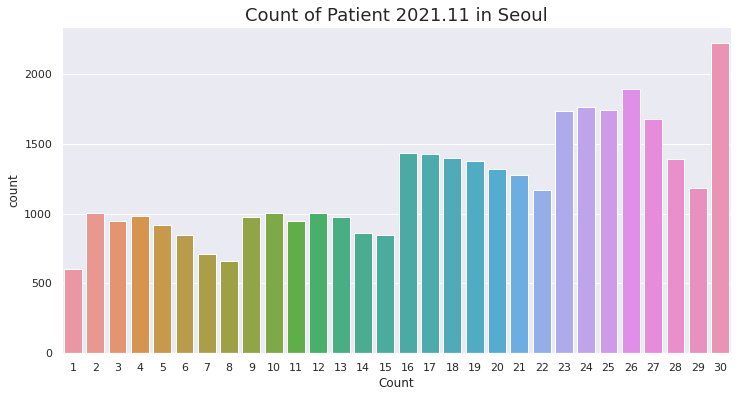

In [ ]:
day = patient_2021_11['확진일'].dt.day

plt.figure(figsize = (12,6))
sns.countplot(x=day, data=patient_2021_11)
plt.title('Count of Patient 2021.11 in Seoul', fontsize=18)   # 제목
plt.xlabel('Count')
sns.set(style="darkgrid")
plt.show()

- 1->2, 8->9등 일주일을 간격으로 월요일과 화요일의 확진자차이가 눈에 띄게 증가하고있는 모습이다.

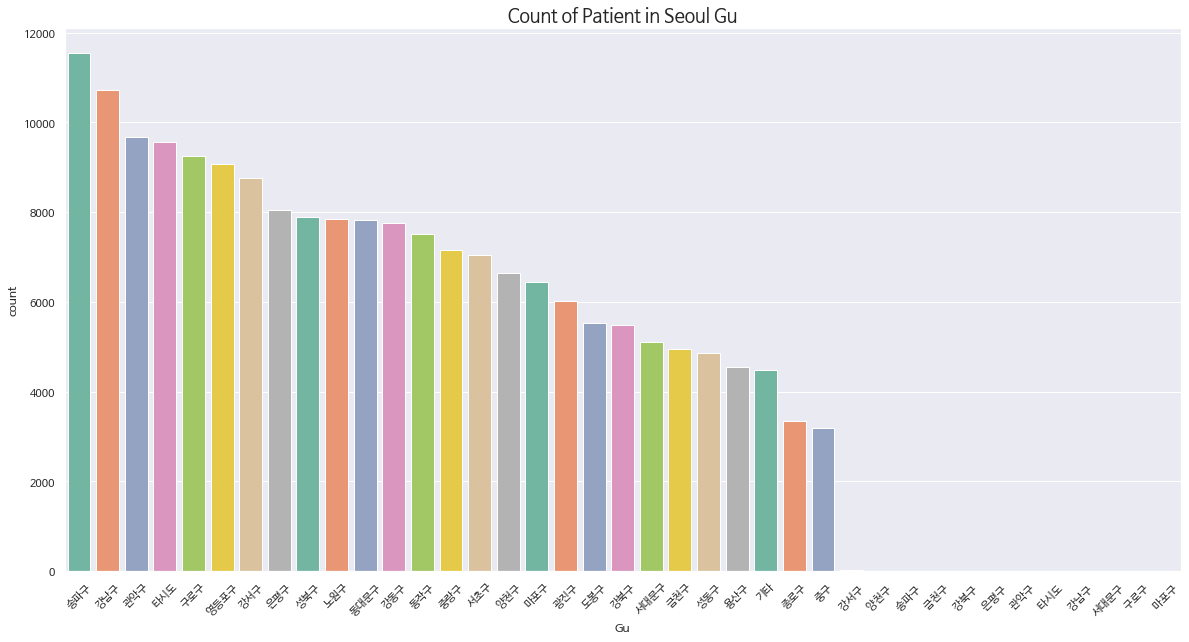

In [ ]:
gu = patient['지역']

plt.figure(figsize=(20,10))
sns.countplot(x=gu, data=patient, order = gu.value_counts().index, palette="Set2")
plt.title('Count of Patient in Seoul Gu', fontsize=18)   # 제목
plt.xlabel('Gu')
sns.set(font='NanumBarunGothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
plt.xticks(rotation=45)
plt.show()


In [ ]:
patient['지역'].value_counts()

송파구      11537
강남구      10720
관악구       9673
타시도       9565
구로구       9251
영등포구      9081
강서구       8754
은평구       8054
성북구       7887
노원구       7850
동대문구      7825
강동구       7765
동작구       7518
중랑구       7167
서초구       7044
양천구       6638
마포구       6443
광진구       6011
도봉구       5522
강북구       5495
서대문구      5111
금천구       4958
성동구       4856
용산구       4550
기타        4484
종로구       3349
중구        3199
강서구         14
양천구          1
송파구          1
금천구          1
강북구          1
은평구          1
관악구          1
타시도          1
강남구          1
서대문구         1
구로구          1
마포구          1
Name: 지역, dtype: int64